# Aim  

The aim of this project is to compare the performance of two different machine learning algorithms on the **Car Evaluation** dataset:  
1. **K-Nearest Neighbors (KNN)** implemented from scratch,  
2. **Decision Trees** (using libraries),

The comparison will focus on accuracy, precision, recall, f1-score, computational efficiency and interpretability to identify the most effective model for predicting car acceptability based on categorical features.

Additionally, I will compare the performance of the KNN algorithm implemented from scratch against the KNN model from the scikit-learn library to analyze any differences in accuracy, precision, recall and f1-score and compuational efficiency.

# Introduction to the Dataset

The **Car Evaluation** dataset is a classification dataset from the UCI Machine Learning Repository, collected from a real-world evaluation process for car buying decisions. The dataset consists of various attributes that describe car specifications and features, such as the price, maintenance costs, safety rating, and others. The goal of the dataset is to predict the acceptability of a car based on these attributes.

The dataset is composed of several categorical features, which represent aspects of the cars, and a target variable that classifies the cars into one of four categories: unacceptable, acceptable, good, and very good. This dataset is commonly used in machine learning and data science for training classification models and evaluating their performance.

Key features of the dataset include:
- **buying**: The price of the car (e.g., low, medium, high, v-high)
- **maint**: The maintenance cost of the car (e.g., low, medium, high, v-high)
- **doors**: The number of doors on the car (e.g., 2, 3, 4, 5-more)
- **persons**: The seating capacity (e.g., 2, 4, more)
- **lug_boot**: The size of the luggage boot (e.g., small, medium, big)
- **safety**: The safety rating (e.g., low, medium, high)

The target variable class, contains the evaluation of the car's acceptability: unacceptable, acceptable, good, or very good.

This dataset is ideal for applying classification algorithms and understanding how different features contribute to car acceptability evaluations.

# Choice of Algorithms

For this classification problem, I have chosen algorithms that are effective at handling categorical data:

- **K-Nearest Neighbors (KNN)**: KNN is simple and works by measuring the similarity between instances, making it well-suited for classification tasks, especially when relationships between features are non-linear.
- **Decision Trees**: These models are excellent for categorical data, as they split the data based on feature values and provide clear, interpretable decision paths.

These algorithms will be applied to the **Car Evaluation** dataset to assess their performance. By comparing these algorithms, I aim to evaluate their accuracy, interpretability, and computational efficiency and ultimately identify the most suitable approach for this classification problem.

# Exploration of the Dataset

The **Car Evaluation** dataset consists of categorical features and a target variable that classifies cars based on their acceptability. I will start by examining the structure of the dataset, such as the number of rows, columns, and data types, etc.

Next, I will check for any missing data or duplicates and address these issues if necessary. This exploration will help me prepare the dataset for model training.

In [1]:
# importing libraries
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from collections import Counter
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.tree import plot_tree

In [2]:
# this code is from uci website link: https://archive.ics.uci.edu/dataset/19/car+evaluation
from ucimlrepo import fetch_ucirepo
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# metadata 
print(car_evaluation.metadata)

# variable information 
print(car_evaluation.variables)

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [3]:
# first few rows
print(X.head())
print(y.head())

  buying  maint doors persons lug_boot safety
0  vhigh  vhigh     2       2    small    low
1  vhigh  vhigh     2       2    small    med
2  vhigh  vhigh     2       2    small   high
3  vhigh  vhigh     2       2      med    low
4  vhigh  vhigh     2       2      med    med
   class
0  unacc
1  unacc
2  unacc
3  unacc
4  unacc


In [4]:
# null values
print(X.isnull().sum())
print(y.isnull().sum())

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
dtype: int64
class    0
dtype: int64


In [5]:
X.describe()

,buying,maint,doors,persons,lug_boot,safety
count,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3
top,vhigh,vhigh,2,2,small,low
freq,432,432,432,576,576,576


In [6]:
# number of unacceptable, acceptable, good and very good cars 
y.value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

# K-Nearest Neighbors (KNN)

The KNN algorithm classifies data points based on the majority class of their k nearest neighbors. Euclidean distance is used to determine proximity.

#### Formula:
1. **Distance Calculation**:
   For two data points x and x', the Euclidean distance d is calculated as:
   $d(x, x') = \sqrt{\sum_{i=1}^{n} (x_i - x'_i)^2}$
   where $(x_i)$ and $(x'_i)$ are the values of the features of data points x and x', respectively.

2. **Classification**:
   After calculating the distances between the test point and all points in the training set, the algorithm selects the k nearest points and assigns the most frequent class label among them as the predicted label for the test point.

   $\hat{y} = \text{mode}({y_1, y_2, ..., y_k})$
   where $(y_1, y_2, ..., y_k)$ are the class labels of the k nearest neighbors.

In [7]:
class KNN:
    def __init__(self, k=3):
        self.k = k  # no. of nearest neighbors

    # euclidean distance 
    def euclidean_distance(self, test_point, train_point):
        return np.sqrt(np.sum((test_point - train_point) ** 2))

    # fit the model 
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # predict the class 
    def predict(self, X_test):
        predictions = [self.predict_single(test_point) for test_point in X_test]
        return np.array(predictions)

    # predict the class of a single point
    def predict_single(self, test_point):
        # distances between test_point and all points in the training set
        distances = [self.euclidean_distance(test_point, train_point) for train_point in self.X_train]
        
        # sort and return indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # return the most common class label among the neighbors
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        return most_common

In [8]:
# encoding for categorical features to numeric
label_encoder = LabelEncoder()

# running this i got a warning that column-vector y was passed when a 1d array was expected. 
# Please change the shape of y to (n_samples, ), for example using ravel().
# so the changes
y = y.values.ravel()
X_encoded = X.apply(label_encoder.fit_transform)
y_encoded = label_encoder.fit_transform(y)

# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=15)

# initializing KNN model
knn_scratch = KNN(k=6)
start = time.time()
knn_scratch.fit(X_train.values, y_train)

# predictions of the test set
y_pred = knn_scratch.predict(X_test.values)
end = time.time()

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy * 100:.2f}%")

# precision
precision = precision_score(y_test, y_pred, average='macro') 
print(f"Precision: {precision * 100:.2f}%")

# recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall * 100:.2f}%")

# F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1 * 100:.2f}%")

print(f"Scratch KNN Time: {end - start:.4f} seconds")

Accuracy : 90.46%
Precision: 87.47%
Recall: 74.05%
F1 Score: 77.02%
Scratch KNN Time: 6.7432 seconds


In [9]:
# knn
knn_library = KNeighborsClassifier(n_neighbors=6)

start = time.time()
knn_library.fit(X_train.values, y_train)

# predictions of the test set
y_pred = knn_library.predict(X_test.values)
end = time.time()

#  cross-validation with 6 folds
cv_scores = cross_val_score(knn_library, X_encoded, y_encoded, cv=6, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy * 100:.2f}%")

# precision
precision = precision_score(y_test, y_pred, average='macro') 
print(f"Precision: {precision * 100:.2f}%")

# recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall * 100:.2f}%")

# F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1 * 100:.2f}%")

print(f"Library KNN Time: {end - start:.4f} seconds")

Cross-validation scores: [0.64930556 0.72569444 0.59722222 0.71527778 0.78125    0.78472222]
Accuracy : 92.20%
Precision: 94.82%
Recall: 78.90%
F1 Score: 83.83%
Library KNN Time: 0.0591 seconds


# Decision Trees

A Decision Tree splits the data into subsets based on feature values, creating a tree structure where each node represents a decision based on a feature, and each leaf node represents a class label.

#### Formula:
1. **Splitting Critera** (using **Gini Impurity** or **Entropy**):
   - **Gini Impurity** for a node t:
     $G(t) = 1 - \sum_{i=1}^{k} (p_i^2)$
     where $p_i$ is the proportion of samples of class i in node t, and k is the number of classes.

   - **Entropy** for a node t:
     $H(t) = - \sum_{i=1}^{k} p_i \log_2(p_i)$
     where $p_i$ is the probability of class i in node t.

2. **Splitting Rule**:
   At each node, the algorithm selects the feature and threshold that minimizes the Gini impurity or entropy.

3. **Tree Construction**:
   The tree is recursively built by splitting nodes until a stopping criteria is reached.

4. **Classification**:
   Once the tree is built, classification is done by following the path from the root to the leaf that corresponds to the input features.

In [10]:
# decision tree
decision_tree = DecisionTreeClassifier(random_state=15)

start = time.time()
decision_tree.fit(X_train, y_train)

# predictions on the test data
y_pred = decision_tree.predict(X_test)
end = time.time()

# cross-validation with 6 folds
cv_scores = cross_val_score(decision_tree, X_encoded, y_encoded, cv=6, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# precision
precision = precision_score(y_test, y_pred, average='macro') 
print(f"Precision: {precision * 100:.2f}%")

# recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall * 100:.2f}%")

# F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1 * 100:.2f}%")

print(f"Decision Tree Time: {end - start:.4f} seconds")

Cross-validation scores: [0.78125    0.87152778 0.83333333 0.93055556 0.88541667 0.85069444]
Accuracy: 95.38%
Precision: 93.49%
Recall: 89.68%
F1 Score: 91.31%
Decision Tree Time: 0.0111 seconds


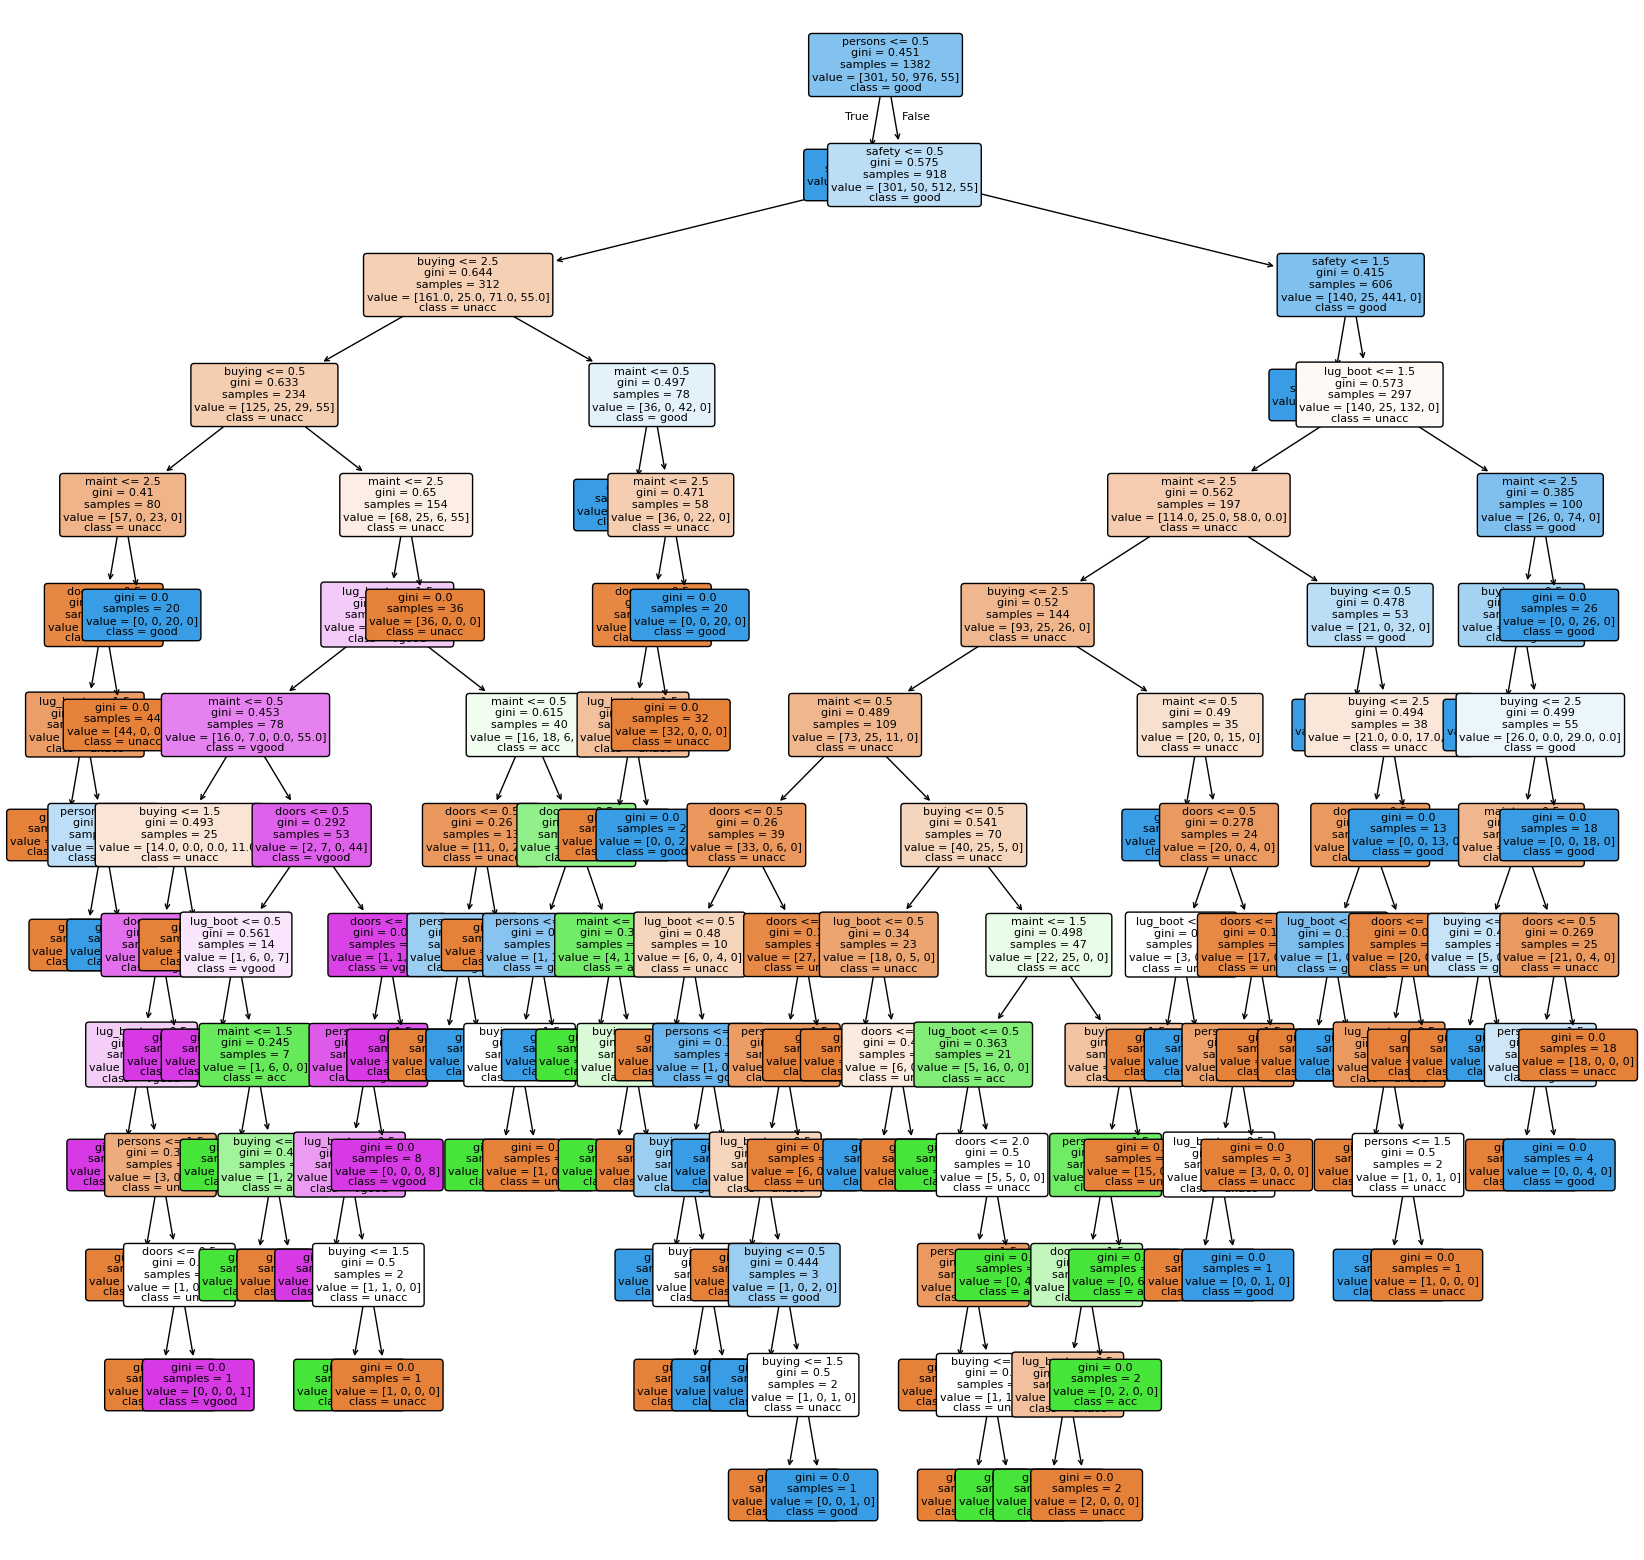

In [11]:
# visualization of decision tree
plt.figure(figsize=(20, 20)) 
plot_tree(decision_tree, 
          feature_names=X.columns,
          class_names=['unacc', 'acc', 'good', 'vgood'],
          filled=True,  # color based on class
          rounded=True,
          fontsize=8)
plt.show()

# Interpretability

Interpretability refers to how easily a human can understand the decisions made by a machine learning model. In this project, I compare the interpretability of K-Nearest Neighbors and Decision Trees.

1. **K-Nearest Neighbors (KNN)**:
   - Interpretability in KNN comes from its simplicity. The model makes predictions based on the closest training examples, meaning it uses similarity to decide the class of a new instance. However, as the dataset grows larger and more complex, it can become harder to interpret the model's decision-making process since the model does not generate explicit rules.
   - While the neighbors used for each prediction can be observed, understanding the overall decision-making process for all data points is not straightforward without additional tools. 

2. **Decision Trees**:
   - Decision Trees are much more interpretable in comparison because they represent a series of decision rules. Each node in the tree splits the data based on a feature threshold, and the leaf nodes correspond to class labels. This structure is inherently interpretable and allows  to trace how a prediction was made by following the path from the root to the leaf.
   - The decision tree can be visualized, which makes it easier for humans to understand the reasoning behind each classification decision. The decision rules at each node can also help identify the most important features that contribute to predictions, offering more transparency than KNN.

In summary, Decision Trees are more interpretable because their decision-making process is explicit and visualizable, making it easier to trace and understand how predictions are made. On the other hand, KNN is less interpretable, especially as the dataset grows, since it doesn't provide any rules for understanding decisions.

# Evaluation

The project compared KNN (from scratch and library) and Decision Trees for car acceptability prediction. While both implementations of KNN achieved reasonable performance, the library-based KNN outperformed the scratch version in accuracy, precision, recall, and F1 score. Additionally, the library KNN was significantly faster, highlighting the efficiency of optimized libraries. Decision Trees performed the best overall, achieving the highest accuracy, recall, and F1 score, along with the fastest computation time. However, KNN's simplicity makes it a strong alternative for smaller datasets, despite its computational inefficiency in scratch implementations.

# Conclusion

The analysis shows that Decision Trees are more effective than KNN for this dataset, providing higher accuracy and faster computation. The library KNN also performed well, demonstrating the value of optimized libraries. Overall, the project successfully met its aim by comparing the strengths and weaknesses of both algorithms in terms of accuracy, computational efficiency, and interpretability.